In [7]:
"""

This is for morphological classification of galaxies by CNN,
New regresssion for B/D ratio
By Kenji Bekki, on 2018/3/30

"""


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import model_from_json
### Added 2018/3/30
from keras.applications import imagenet_utils
from keras.models import load_model
###
import keras.callbacks
import numpy as np
#import keras.backend.tensorflow_backend as KTF
#import tensorflow as tf
import os.path


### Total model number = (100*1) * nmodel

#iset=int(input('Input the total number of sets of models '))
#nmodel0=int(input('Input the total number of images per model '))
#nmodel=nmodel0*iset
#epochs=int(input('Input the number of epochs'))
iset=5
nmodel0=100
epochs=1000
nmodel=nmodel0*iset
nmodel=1000
print('nmodel',nmodel)

### Original values
#batch_size = 128
#num_classes = 10
#epochs = 12
batch_size = 200
num_classes = 2
#epochs = 500
nb_epoch=epochs
n_mesh=50
#n_mesh=20
#nmodel=4000

img_rows, img_cols = n_mesh, n_mesh
n_mesh2=n_mesh*n_mesh-1
n_mesh3=n_mesh*n_mesh


print(img_rows, img_cols, n_mesh2)
#stop



#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')
#print(y_test.shape[0], 'y.test samples')
#print(str(y_test[0]))
#print(str(y_test[1]))
#print(str(y_test[2]))

#y_train = y_train.astype('int32')
#y_test = y_test.astype('int32')
#y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
#y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

# This is for simlation data sets

with open('2dft.dat') as f:
  lines=f.readlines()
with open('2dftn1.dat') as f:
  lines1=f.readlines()
with open('2dftn2.dat') as f:
  lines2=f.readlines()


x_train=np.zeros((nmodel,n_mesh3))
x_test=np.zeros((nmodel,n_mesh3))
#y_train=np.zeros(nmodel,dtype=np.int)
#y_test=np.zeros(nmodel,dtype=np.int)
y_train=np.zeros((nmodel,2))
y_test=np.zeros((nmodel,2))
#y_test=np.zeros(nmodel)
#print(y_train)

# For 2D density map data
ibin=0
jbin=-1
for num,j in enumerate(lines):
  jbin=jbin+1
  tm=j.strip().split()
  x_train[ibin,jbin]=float(tm[0])
  x_test[ibin,jbin]=float(tm[0])
#  print('ibin,jbin',ibin,jbin)
  if jbin == n_mesh2:
    ibin+=1
    jbin=-1

# For morphological map (theta)
ibin=0
for num,j in enumerate(lines1):
  tm=j.strip().split()
  y_train[ibin,0]=float(tm[0])
  y_test[ibin,0]=float(tm[0])
#  y_train[ibin]=int(tm[0])-1
#  y_test[ibin]=int(tm[0])-1
#  print('ibin, (Morpholigcl type)',ibin,y_train[ibin])
  ibin+=1

# For morphological map (phi)
ibin=0
for num,j in enumerate(lines2):
  tm=j.strip().split()
  y_train[ibin,1]=float(tm[0])
  y_test[ibin,1]=float(tm[0])
#  y_train[ibin]=int(tm[0])-1
#  y_test[ibin]=int(tm[0])-1
#  print('ibin, (Morpholigcl type)',ibin,y_train[ibin])
  ibin+=1



x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
# For laelling
#y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
#y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

print('Galaxy type',y_train[:5])

#stop

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

### For labelling of morphological types

#model.add(Dense(num_classes, activation='softmax'))
#model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])

### For regression of B/D

model.add(Dense(2, activation='linear'))
#model.add(Dense(1))
#model.add(Activation=('linear'))
#model.add(activation=('linear'))
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


print('save the architecture of a model')

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")






nmodel 1000
50 50 2499
Galaxy type [[4.15999365 3.19249654]
 [4.15999365 3.19249654]
 [4.15999365 3.19249654]
 [4.15999365 3.19249654]
 [4.15999365 3.19249654]]
Epoch 1/1000
5/5 [==============================] - 11s 1s/step - loss: 32.3969 - accuracy: 0.5204 - val_loss: 32.1229 - val_accuracy: 0.4700
Epoch 2/1000
5/5 [==============================] - 1s 263ms/step - loss: 31.8055 - accuracy: 0.4741 - val_loss: 31.4007 - val_accuracy: 0.4700
Epoch 3/1000
5/5 [==============================] - 1s 168ms/step - loss: 30.9369 - accuracy: 0.4930 - val_loss: 30.5388 - val_accuracy: 0.4700
Epoch 4/1000
5/5 [==============================] - 1s 161ms/step - loss: 30.4926 - accuracy: 0.4780 - val_loss: 29.4550 - val_accuracy: 0.4700
Epoch 5/1000
5/5 [==============================] - 1s 138ms/step - loss: 29.3212 - accuracy: 0.4973 - val_loss: 28.3090 - val_accuracy: 0.5300
Epoch 6/1000
5/5 [==============================] - 1s 120ms/step - loss: 28.6306 - accuracy: 0.4928 - val_loss: 27.1552 

Epoch 57/1000
5/5 [==============================] - 1s 92ms/step - loss: 9.0729 - accuracy: 0.5057 - val_loss: 8.1426 - val_accuracy: 0.5300
Epoch 58/1000
5/5 [==============================] - 1s 110ms/step - loss: 9.2455 - accuracy: 0.5173 - val_loss: 8.1447 - val_accuracy: 0.5300
Epoch 59/1000
5/5 [==============================] - 1s 111ms/step - loss: 8.8799 - accuracy: 0.5204 - val_loss: 8.1389 - val_accuracy: 0.5300
Epoch 60/1000
5/5 [==============================] - 1s 151ms/step - loss: 8.9074 - accuracy: 0.4490 - val_loss: 8.1395 - val_accuracy: 0.5300
Epoch 61/1000
5/5 [==============================] - 2s 380ms/step - loss: 9.0105 - accuracy: 0.5245 - val_loss: 8.1359 - val_accuracy: 0.5300
Epoch 62/1000
5/5 [==============================] - 1s 130ms/step - loss: 9.1295 - accuracy: 0.5201 - val_loss: 8.1365 - val_accuracy: 0.5300
Epoch 63/1000
5/5 [==============================] - 1s 232ms/step - loss: 9.5013 - accuracy: 0.4911 - val_loss: 8.1342 - val_accuracy: 0.5300


5/5 [==============================] - 1s 118ms/step - loss: 9.2095 - accuracy: 0.5073 - val_loss: 8.1149 - val_accuracy: 0.5300
Epoch 115/1000
5/5 [==============================] - 1s 130ms/step - loss: 9.1954 - accuracy: 0.4819 - val_loss: 8.1126 - val_accuracy: 0.5300
Epoch 116/1000
5/5 [==============================] - 1s 115ms/step - loss: 8.7757 - accuracy: 0.5053 - val_loss: 8.1176 - val_accuracy: 0.5300
Epoch 117/1000
5/5 [==============================] - 1s 108ms/step - loss: 8.9604 - accuracy: 0.4968 - val_loss: 8.1172 - val_accuracy: 0.5300
Epoch 118/1000
5/5 [==============================] - 1s 122ms/step - loss: 9.0432 - accuracy: 0.4959 - val_loss: 8.1206 - val_accuracy: 0.5300
Epoch 119/1000
5/5 [==============================] - 1s 109ms/step - loss: 8.9540 - accuracy: 0.5078 - val_loss: 8.1173 - val_accuracy: 0.5300
Epoch 120/1000
5/5 [==============================] - 1s 113ms/step - loss: 8.9403 - accuracy: 0.4974 - val_loss: 8.1161 - val_accuracy: 0.5300
Epoch 1

5/5 [==============================] - 1s 134ms/step - loss: 8.7382 - accuracy: 0.5223 - val_loss: 8.1030 - val_accuracy: 0.5300
Epoch 172/1000
5/5 [==============================] - 1s 124ms/step - loss: 8.9764 - accuracy: 0.4809 - val_loss: 8.1058 - val_accuracy: 0.5300
Epoch 173/1000
5/5 [==============================] - 1s 116ms/step - loss: 8.7920 - accuracy: 0.5281 - val_loss: 8.1076 - val_accuracy: 0.5300
Epoch 174/1000
5/5 [==============================] - 1s 116ms/step - loss: 8.7362 - accuracy: 0.5188 - val_loss: 8.1063 - val_accuracy: 0.5300
Epoch 175/1000
5/5 [==============================] - 1s 115ms/step - loss: 8.9845 - accuracy: 0.4974 - val_loss: 8.1030 - val_accuracy: 0.5300
Epoch 176/1000
5/5 [==============================] - 0s 91ms/step - loss: 8.8808 - accuracy: 0.5083 - val_loss: 8.1033 - val_accuracy: 0.5300
Epoch 177/1000
5/5 [==============================] - 1s 126ms/step - loss: 8.5713 - accuracy: 0.4963 - val_loss: 8.1038 - val_accuracy: 0.5300
Epoch 17

5/5 [==============================] - 1s 108ms/step - loss: 8.5831 - accuracy: 0.5109 - val_loss: 8.0964 - val_accuracy: 0.5300
Epoch 229/1000
5/5 [==============================] - 1s 103ms/step - loss: 8.4454 - accuracy: 0.5289 - val_loss: 8.0974 - val_accuracy: 0.5300
Epoch 230/1000
5/5 [==============================] - 1s 99ms/step - loss: 8.8202 - accuracy: 0.5236 - val_loss: 8.0962 - val_accuracy: 0.5300
Epoch 231/1000
5/5 [==============================] - 1s 106ms/step - loss: 8.9053 - accuracy: 0.5048 - val_loss: 8.0955 - val_accuracy: 0.5300
Epoch 232/1000
5/5 [==============================] - 0s 100ms/step - loss: 8.6492 - accuracy: 0.5023 - val_loss: 8.0975 - val_accuracy: 0.5300
Epoch 233/1000
5/5 [==============================] - 1s 126ms/step - loss: 8.6784 - accuracy: 0.5387 - val_loss: 8.0991 - val_accuracy: 0.5300
Epoch 234/1000
5/5 [==============================] - 0s 104ms/step - loss: 9.1682 - accuracy: 0.5100 - val_loss: 8.1023 - val_accuracy: 0.5300
Epoch 23

5/5 [==============================] - 1s 106ms/step - loss: 8.6476 - accuracy: 0.5082 - val_loss: 8.0822 - val_accuracy: 0.5300
Epoch 286/1000
5/5 [==============================] - 0s 100ms/step - loss: 8.7689 - accuracy: 0.5109 - val_loss: 8.0841 - val_accuracy: 0.5300
Epoch 287/1000
5/5 [==============================] - 1s 113ms/step - loss: 8.8641 - accuracy: 0.5194 - val_loss: 8.0882 - val_accuracy: 0.5300
Epoch 288/1000
5/5 [==============================] - 1s 110ms/step - loss: 8.6796 - accuracy: 0.4887 - val_loss: 8.0855 - val_accuracy: 0.5300
Epoch 289/1000
5/5 [==============================] - 0s 94ms/step - loss: 8.9350 - accuracy: 0.5096 - val_loss: 8.0850 - val_accuracy: 0.5300
Epoch 290/1000
5/5 [==============================] - 1s 121ms/step - loss: 8.8154 - accuracy: 0.5080 - val_loss: 8.0855 - val_accuracy: 0.5300
Epoch 291/1000
5/5 [==============================] - 1s 110ms/step - loss: 8.9083 - accuracy: 0.5104 - val_loss: 8.0865 - val_accuracy: 0.5300
Epoch 29

5/5 [==============================] - 0s 75ms/step - loss: 8.8835 - accuracy: 0.4928 - val_loss: 8.0750 - val_accuracy: 0.5300
Epoch 343/1000
5/5 [==============================] - 0s 81ms/step - loss: 8.8258 - accuracy: 0.5106 - val_loss: 8.0762 - val_accuracy: 0.5300
Epoch 344/1000
5/5 [==============================] - 0s 94ms/step - loss: 8.5967 - accuracy: 0.5347 - val_loss: 8.0767 - val_accuracy: 0.5300
Epoch 345/1000
5/5 [==============================] - 0s 78ms/step - loss: 8.4820 - accuracy: 0.4824 - val_loss: 8.0752 - val_accuracy: 0.5300
Epoch 346/1000
5/5 [==============================] - 1s 114ms/step - loss: 8.9384 - accuracy: 0.4755 - val_loss: 8.0752 - val_accuracy: 0.5300
Epoch 347/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.6368 - accuracy: 0.5140 - val_loss: 8.0729 - val_accuracy: 0.5300
Epoch 348/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.8344 - accuracy: 0.5200 - val_loss: 8.0758 - val_accuracy: 0.5300
Epoch 349/100

5/5 [==============================] - 0s 78ms/step - loss: 8.6792 - accuracy: 0.5219 - val_loss: 8.0641 - val_accuracy: 0.5300
Epoch 400/1000
5/5 [==============================] - 0s 74ms/step - loss: 8.7374 - accuracy: 0.5254 - val_loss: 8.0621 - val_accuracy: 0.5300
Epoch 401/1000
5/5 [==============================] - 0s 80ms/step - loss: 9.0519 - accuracy: 0.4854 - val_loss: 8.0617 - val_accuracy: 0.5300
Epoch 402/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.6871 - accuracy: 0.5163 - val_loss: 8.0603 - val_accuracy: 0.5300
Epoch 403/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.7502 - accuracy: 0.5127 - val_loss: 8.0589 - val_accuracy: 0.5300
Epoch 404/1000
5/5 [==============================] - 0s 81ms/step - loss: 8.4921 - accuracy: 0.4954 - val_loss: 8.0595 - val_accuracy: 0.5300
Epoch 405/1000
5/5 [==============================] - 0s 90ms/step - loss: 8.6304 - accuracy: 0.5132 - val_loss: 8.0599 - val_accuracy: 0.5300
Epoch 406/1000

5/5 [==============================] - 0s 80ms/step - loss: 8.7763 - accuracy: 0.4903 - val_loss: 8.0517 - val_accuracy: 0.5300
Epoch 457/1000
5/5 [==============================] - 0s 79ms/step - loss: 8.6414 - accuracy: 0.5134 - val_loss: 8.0506 - val_accuracy: 0.5300
Epoch 458/1000
5/5 [==============================] - 0s 74ms/step - loss: 8.5463 - accuracy: 0.4874 - val_loss: 8.0494 - val_accuracy: 0.5300
Epoch 459/1000
5/5 [==============================] - 0s 99ms/step - loss: 8.7896 - accuracy: 0.4998 - val_loss: 8.0521 - val_accuracy: 0.5300
Epoch 460/1000
5/5 [==============================] - 0s 78ms/step - loss: 8.6323 - accuracy: 0.4711 - val_loss: 8.0506 - val_accuracy: 0.5300
Epoch 461/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.7375 - accuracy: 0.5210 - val_loss: 8.0507 - val_accuracy: 0.5300
Epoch 462/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.6433 - accuracy: 0.4757 - val_loss: 8.0513 - val_accuracy: 0.5300
Epoch 463/1000

5/5 [==============================] - 0s 84ms/step - loss: 8.8827 - accuracy: 0.4979 - val_loss: 8.0441 - val_accuracy: 0.5300
Epoch 514/1000
5/5 [==============================] - 0s 91ms/step - loss: 8.9329 - accuracy: 0.5059 - val_loss: 8.0426 - val_accuracy: 0.5300
Epoch 515/1000
5/5 [==============================] - 0s 81ms/step - loss: 8.5554 - accuracy: 0.5296 - val_loss: 8.0422 - val_accuracy: 0.5300
Epoch 516/1000
5/5 [==============================] - 0s 93ms/step - loss: 8.9004 - accuracy: 0.5490 - val_loss: 8.0439 - val_accuracy: 0.5300
Epoch 517/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.8250 - accuracy: 0.4721 - val_loss: 8.0439 - val_accuracy: 0.5300
Epoch 518/1000
5/5 [==============================] - 0s 79ms/step - loss: 8.6496 - accuracy: 0.5133 - val_loss: 8.0425 - val_accuracy: 0.5300
Epoch 519/1000
5/5 [==============================] - 0s 82ms/step - loss: 8.6510 - accuracy: 0.5698 - val_loss: 8.0429 - val_accuracy: 0.5300
Epoch 520/1000

5/5 [==============================] - 0s 78ms/step - loss: 8.8590 - accuracy: 0.5047 - val_loss: 8.0368 - val_accuracy: 0.5300
Epoch 571/1000
5/5 [==============================] - 0s 76ms/step - loss: 8.9486 - accuracy: 0.5125 - val_loss: 8.0353 - val_accuracy: 0.5300
Epoch 572/1000
5/5 [==============================] - 1s 120ms/step - loss: 8.5503 - accuracy: 0.4999 - val_loss: 8.0337 - val_accuracy: 0.5300
Epoch 573/1000
5/5 [==============================] - 1s 122ms/step - loss: 8.6736 - accuracy: 0.5206 - val_loss: 8.0349 - val_accuracy: 0.5300
Epoch 574/1000
5/5 [==============================] - 0s 80ms/step - loss: 8.7195 - accuracy: 0.5211 - val_loss: 8.0333 - val_accuracy: 0.5300
Epoch 575/1000
5/5 [==============================] - 0s 76ms/step - loss: 8.4922 - accuracy: 0.5081 - val_loss: 8.0323 - val_accuracy: 0.5300
Epoch 576/1000
5/5 [==============================] - 0s 76ms/step - loss: 8.7789 - accuracy: 0.5326 - val_loss: 8.0319 - val_accuracy: 0.5300
Epoch 577/10

5/5 [==============================] - 0s 79ms/step - loss: 8.7339 - accuracy: 0.4994 - val_loss: 8.0194 - val_accuracy: 0.5300
Epoch 628/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.7683 - accuracy: 0.5239 - val_loss: 8.0209 - val_accuracy: 0.5300
Epoch 629/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.8719 - accuracy: 0.5162 - val_loss: 8.0212 - val_accuracy: 0.5300
Epoch 630/1000
5/5 [==============================] - 1s 119ms/step - loss: 8.7857 - accuracy: 0.5105 - val_loss: 8.0201 - val_accuracy: 0.5300
Epoch 631/1000
5/5 [==============================] - 1s 120ms/step - loss: 8.5954 - accuracy: 0.5203 - val_loss: 8.0172 - val_accuracy: 0.5300
Epoch 632/1000
5/5 [==============================] - 1s 140ms/step - loss: 8.5869 - accuracy: 0.5215 - val_loss: 8.0146 - val_accuracy: 0.5300
Epoch 633/1000
5/5 [==============================] - 0s 89ms/step - loss: 8.7908 - accuracy: 0.5157 - val_loss: 8.0144 - val_accuracy: 0.5300
Epoch 634/1

5/5 [==============================] - 0s 90ms/step - loss: 8.7335 - accuracy: 0.5099 - val_loss: 8.0115 - val_accuracy: 0.5300
Epoch 685/1000
5/5 [==============================] - 0s 85ms/step - loss: 8.7258 - accuracy: 0.5150 - val_loss: 8.0105 - val_accuracy: 0.5300
Epoch 686/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.8072 - accuracy: 0.4897 - val_loss: 8.0098 - val_accuracy: 0.5300
Epoch 687/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.6921 - accuracy: 0.5086 - val_loss: 8.0070 - val_accuracy: 0.5300
Epoch 688/1000
5/5 [==============================] - 1s 81ms/step - loss: 8.8957 - accuracy: 0.5353 - val_loss: 8.0093 - val_accuracy: 0.5300
Epoch 689/1000
5/5 [==============================] - 1s 93ms/step - loss: 8.4308 - accuracy: 0.5087 - val_loss: 8.0122 - val_accuracy: 0.5300
Epoch 690/1000
5/5 [==============================] - 0s 86ms/step - loss: 8.8571 - accuracy: 0.5216 - val_loss: 8.0128 - val_accuracy: 0.5300
Epoch 691/1000

5/5 [==============================] - 0s 88ms/step - loss: 8.7440 - accuracy: 0.5381 - val_loss: 8.0080 - val_accuracy: 0.5300
Epoch 742/1000
5/5 [==============================] - 0s 84ms/step - loss: 8.8580 - accuracy: 0.4873 - val_loss: 8.0053 - val_accuracy: 0.5300
Epoch 743/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.8063 - accuracy: 0.4942 - val_loss: 8.0025 - val_accuracy: 0.5300
Epoch 744/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.4460 - accuracy: 0.5264 - val_loss: 8.0008 - val_accuracy: 0.5300
Epoch 745/1000
5/5 [==============================] - 0s 88ms/step - loss: 8.8199 - accuracy: 0.5191 - val_loss: 7.9995 - val_accuracy: 0.5300
Epoch 746/1000
5/5 [==============================] - 0s 88ms/step - loss: 8.7610 - accuracy: 0.5076 - val_loss: 7.9986 - val_accuracy: 0.5300
Epoch 747/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.6200 - accuracy: 0.5197 - val_loss: 7.9949 - val_accuracy: 0.5300
Epoch 748/1000

5/5 [==============================] - 0s 87ms/step - loss: 8.8170 - accuracy: 0.5217 - val_loss: 7.9853 - val_accuracy: 0.5300
Epoch 799/1000
5/5 [==============================] - 0s 74ms/step - loss: 8.7456 - accuracy: 0.5140 - val_loss: 7.9862 - val_accuracy: 0.5300
Epoch 800/1000
5/5 [==============================] - 0s 91ms/step - loss: 8.7817 - accuracy: 0.5275 - val_loss: 7.9888 - val_accuracy: 0.5300
Epoch 801/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.7101 - accuracy: 0.5429 - val_loss: 7.9884 - val_accuracy: 0.5300
Epoch 802/1000
5/5 [==============================] - 0s 77ms/step - loss: 8.6651 - accuracy: 0.5251 - val_loss: 7.9892 - val_accuracy: 0.5300
Epoch 803/1000
5/5 [==============================] - 0s 82ms/step - loss: 8.4841 - accuracy: 0.5339 - val_loss: 7.9900 - val_accuracy: 0.5300
Epoch 804/1000
5/5 [==============================] - 0s 89ms/step - loss: 8.4028 - accuracy: 0.5328 - val_loss: 7.9913 - val_accuracy: 0.5300
Epoch 805/1000

5/5 [==============================] - 0s 75ms/step - loss: 8.8347 - accuracy: 0.5268 - val_loss: 7.9768 - val_accuracy: 0.5300
Epoch 856/1000
5/5 [==============================] - 0s 82ms/step - loss: 8.5137 - accuracy: 0.4933 - val_loss: 7.9767 - val_accuracy: 0.5300
Epoch 857/1000
5/5 [==============================] - 0s 81ms/step - loss: 8.6040 - accuracy: 0.5314 - val_loss: 7.9768 - val_accuracy: 0.5300
Epoch 858/1000
5/5 [==============================] - 0s 89ms/step - loss: 8.7594 - accuracy: 0.5137 - val_loss: 7.9782 - val_accuracy: 0.5300
Epoch 859/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.5287 - accuracy: 0.5541 - val_loss: 7.9778 - val_accuracy: 0.5300
Epoch 860/1000
5/5 [==============================] - 0s 77ms/step - loss: 8.7871 - accuracy: 0.5014 - val_loss: 7.9771 - val_accuracy: 0.5300
Epoch 861/1000
5/5 [==============================] - 0s 77ms/step - loss: 8.5266 - accuracy: 0.5230 - val_loss: 7.9744 - val_accuracy: 0.5300
Epoch 862/1000

5/5 [==============================] - 0s 91ms/step - loss: 8.6204 - accuracy: 0.4937 - val_loss: 7.9652 - val_accuracy: 0.5300
Epoch 913/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.9937 - accuracy: 0.5211 - val_loss: 7.9680 - val_accuracy: 0.5300
Epoch 914/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.5794 - accuracy: 0.5447 - val_loss: 7.9661 - val_accuracy: 0.5300
Epoch 915/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.5020 - accuracy: 0.5545 - val_loss: 7.9672 - val_accuracy: 0.5300
Epoch 916/1000
5/5 [==============================] - 0s 78ms/step - loss: 8.7737 - accuracy: 0.5382 - val_loss: 7.9679 - val_accuracy: 0.5300
Epoch 917/1000
5/5 [==============================] - 0s 76ms/step - loss: 8.4899 - accuracy: 0.5376 - val_loss: 7.9666 - val_accuracy: 0.5300
Epoch 918/1000
5/5 [==============================] - 0s 77ms/step - loss: 8.6008 - accuracy: 0.5187 - val_loss: 7.9655 - val_accuracy: 0.5300
Epoch 919/1000

5/5 [==============================] - 0s 76ms/step - loss: 8.8570 - accuracy: 0.5744 - val_loss: 7.9548 - val_accuracy: 0.5300
Epoch 970/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.5681 - accuracy: 0.5471 - val_loss: 7.9565 - val_accuracy: 0.5300
Epoch 971/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.5641 - accuracy: 0.5418 - val_loss: 7.9551 - val_accuracy: 0.5300
Epoch 972/1000
5/5 [==============================] - 0s 77ms/step - loss: 8.8573 - accuracy: 0.5070 - val_loss: 7.9541 - val_accuracy: 0.5300
Epoch 973/1000
5/5 [==============================] - 0s 81ms/step - loss: 8.7459 - accuracy: 0.5185 - val_loss: 7.9544 - val_accuracy: 0.5300
Epoch 974/1000
5/5 [==============================] - 0s 81ms/step - loss: 8.5465 - accuracy: 0.5235 - val_loss: 7.9559 - val_accuracy: 0.5300
Epoch 975/1000
5/5 [==============================] - 0s 75ms/step - loss: 8.7143 - accuracy: 0.5106 - val_loss: 7.9581 - val_accuracy: 0.5300
Epoch 976/1000

float64
(50, 50, 1)


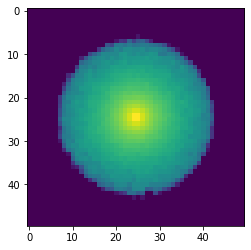

In [2]:
from matplotlib import image
from matplotlib import pyplot

# summarize shape of the pixel array
print(x_train[0].dtype)
print(x_train[0].shape)
# display the array of pixels as an image
pyplot.imshow(x_train[200])
pyplot.show()

In [3]:
import numpy as np
import pandas as pd

In [4]:
arr = np.genfromtxt('2dft.dat')
arr = np.reshape(arr, [1000, 50, 50])


<Figure size 432x288 with 0 Axes>

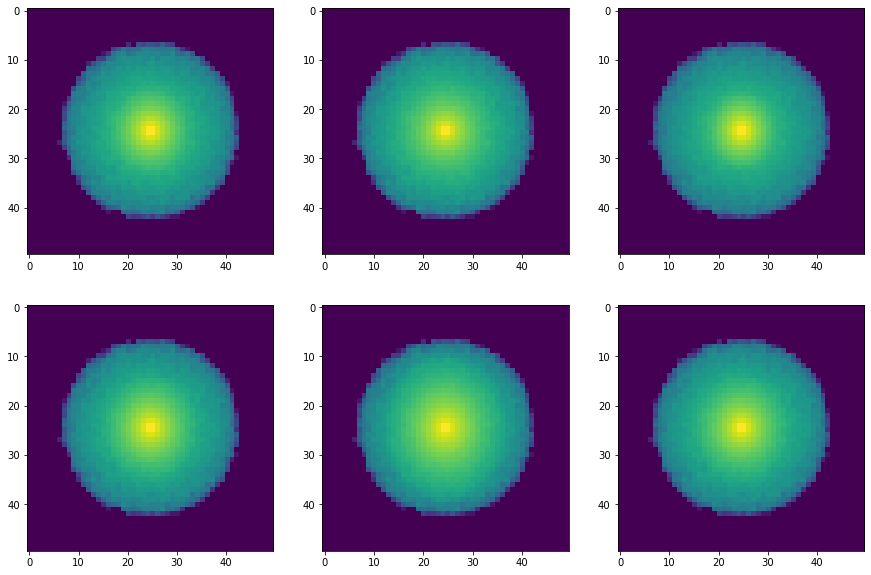

In [5]:
%matplotlib inline
pyplot.figure();
f, axs = pyplot.subplots(2, 3, figsize=(15,10));
axs[0][0].imshow(arr[5]);
axs[0][1].imshow(arr[15]);
axs[0][2].imshow(arr[25]);
axs[1][0].imshow(arr[35]);
axs[1][1].imshow(arr[45]);
axs[1][2].imshow(arr[55]);
pyplot.show();

In [6]:
from sklearn import model_selection

x_dataset_series = np.genfromtxt('2dft.dat', autostrip=True, max_rows=nmodel*n_mesh3)
y_dataset1 = np.genfromtxt('2dftn1.dat', autostrip=True, max_rows=nmodel)
y_dataset2 = np.genfromtxt('2dftn2.dat', autostrip=True, max_rows=nmodel)

x_dataset = x_train_series.reshape(nmodel, n_mesh3)
y_dataset = np.c_[y_train1, y_train2]

NameError: name 'x_train_series' is not defined

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_dataset, y_dataset, test_size=0.2)

In [ ]:
print(model.metrics_names)